In [3]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

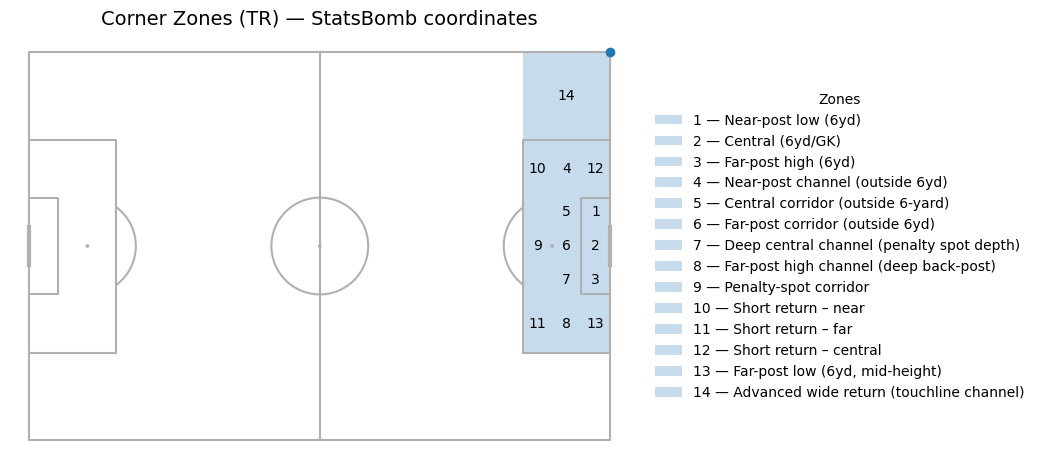

In [4]:
PITCH_X, PITCH_Y = 120, 80

def _flip_rect(rect, flip_x=False, flip_y=False):
    xmin, xmax, ymin, ymax, name = rect
    if flip_x:
        xmin, xmax = PITCH_X - xmax, PITCH_X - xmin
    if flip_y:
        ymin, ymax = PITCH_Y - ymax, PITCH_Y - ymin
    xmin, xmax = min(xmin, xmax), max(xmin, xmax)
    ymin, ymax = min(ymin, ymax), max(ymin, ymax)
    return (xmin, xmax, ymin, ymax, name)

def corner_zones(corner="TR"):
    # Base definition for TR; tweak as you like
    base = [
        (114, 120, 30, 36, "Near-post low (6yd)"), #1 
        (114, 120, 36, 44, "Central (6yd/GK)"), #2 
        (114, 120, 44, 50, "Far-post high (6yd)"), #3
        (108, 114, 18, 30, "Near-post channel (outside 6yd)"), #4
        (108, 114, 30, 36, "Central corridor (outside 6-yard)"), #5
        (108, 114, 36, 44, "Far-post corridor (outside 6yd)"), #6
        (108, 114, 44, 50, "Deep central channel (penalty spot depth)"), #7
        (108, 114, 50, 62, "Far-post high channel (deep back-post)"), #8
        (102, 108, 30, 50, "Penalty-spot corridor"), #9
        (102, 108, 18, 30, "Short return – near"), #10
        (102, 108, 50, 62, "Short return – far"), #11
        (114, 120, 30, 18, "Short return – central"), #12
        (114, 120, 50, 62, "Far-post low (6yd, mid-height)"), #13
        (102, 120, 0, 18, "Advanced wide return (touchline channel)"), #14
    ]
    flip_x = corner in {"TL", "BL"}
    flip_y = corner in {"BR", "BL"}
    return [_flip_rect(r, flip_x=flip_x, flip_y=flip_y) for r in base]

def draw_corner_pitch_with_legend(corner="TR", alpha=0.25):
    pitch = Pitch(pitch_type="statsbomb", line_zorder=2, linewidth=1.5, pitch_color="white")
    fig, ax = pitch.draw(figsize=(10, 6))
    zones = corner_zones(corner)

    # Number zones 1..N and draw rectangles
    legend_handles = []
    for i, (xmin, xmax, ymin, ymax, name) in enumerate(zones, start=1):
        width, height = (xmax - xmin), (ymax - ymin)
        rect = Rectangle((xmin, ymin), width, height, alpha=alpha, zorder=1)
        ax.add_patch(rect)

        # Put only the number on the pitch
        ax.text(
            xmin + width/2.0,
            ymin + height/2.0,
            str(i),
            ha="center", va="center", fontsize=10, zorder=3
        )

        # Build a legend entry "i — full name"
        legend_handles.append(Rectangle((0, 0), 1, 1, alpha=alpha, label=f"{i} — {name}"))

    # Corner marker
    corner_marks = {"TR": (PITCH_X, 0), "BR": (PITCH_X, PITCH_Y), "TL": (0, 0), "BL": (0, PITCH_Y)}
    cx, cy = corner_marks[corner]
    ax.plot([cx], [cy], marker="o", markersize=6)

    # Put legend OUTSIDE (right side). Adjust bbox_to_anchor x as needed.
    lg = ax.legend(
        handles=legend_handles,
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),
        frameon=False,
        title="Zones",
    )

    ax.set_title(f"Corner Zones ({corner}) — StatsBomb coordinates", fontsize=14)
    fig.tight_layout()
    return fig, ax

# Example:
fig, ax = draw_corner_pitch_with_legend(corner="TR")
plt.show()
